In [16]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

In [17]:
nabil = pd.read_csv("./data/fundamental data/commercial bank/NABIL.csv")
abdl = pd.read_csv("./data/fundamental data/commercial bank/ADBL.csv")
chcl = pd.read_csv("./data/fundamental data/hydro/CHCL.csv")
icfc = pd.read_csv("./data/fundamental data/finance/ICFC.csv")

In [18]:
def con_graph(tensor):
    # Create visibility graph
    G = nx.Graph()
    n = len(tensor)

    # Add nodes
    for i in range(n):
        G.add_node(i)

    # Compute visibility connections
    for i in range(n):
        for j in range(i+1, n):
            # Check visibility condition
            visible = True
            for k in range(i+1, j):
                if max(tensor[i], tensor[j]) < tensor[k]:
                    visible = False
                    break
            if visible:
                G.add_edge(i, j)

    # Visualization
    plt.figure(figsize=(15, 6))
    plt.title("Time Series to Visibility Graph Conversion")

    # Bar chart with transparency
    plt.bar(range(n), tensor, alpha=0.3, color='blue')

    # Network graph positioning
    pos = {i: (i, tensor[i]) for i in range(n)}
    # nx.draw_networkx_nodes(G, pos, alpha=0.7)
    # nx.draw_networkx_edges(G, pos, alpha=0.5)

    plt.xlabel("Index")
    plt.ylabel("Value")
    plt.tight_layout()
    plt.show()

    return G

def prepare_stock(df):
    df = df.drop(columns=["status"])
    df["published_date"] = pd.to_datetime(df["published_date"])
    if df.isnull().values.any() or np.isinf(df.values).any():
        df = df.fillna(df.mean())
        df = df.replace([np.inf, -np.inf], np.nan)
        df = df.fillna(df.mean())
    return df

    # G1 = nx.visibility_graph(G1)
    # G2 = nx.visibility_graph(G2)

def connect_visibility_graphs(G1, G2, dates1, dates2):
    G1 = nx.visibility_graph(G1)
    G2 = nx.visibility_graph(G2)
    # Create a combined graph
    combined_graph = nx.compose(G1, G2)

    # Positioning for visualization
    pos1 = {i: (i, 1) for i in G1.nodes()}
    pos2 = {i: (i, 0) for i in G2.nodes()}
    pos = {**pos1, **pos2}

    # Visualization
    plt.figure(figsize=(20, 12))
    plt.title("Combined Visibility Graphs")

    # Draw first graph
    nx.draw_networkx_nodes(G1, pos1, node_color='blue', alpha=0.7, node_size=900)
    nx.draw_networkx_edges(G1, pos1, edge_color='blue', alpha=0.5)

    # Draw second graph
    nx.draw_networkx_nodes(G2, pos2, node_color='green', alpha=0.7, node_size=900)
    nx.draw_networkx_edges(G2, pos2, edge_color='green', alpha=0.5)

    plt.tight_layout()
    plt.show()

    return combined_graph

def connect_visibility_graphs2(data1, data2, dates1, dates2):
    G1 = nx.visibility_graph(data1)
    G2 = nx.visibility_graph(data2)

    # Create a combined graph
    combined_graph = nx.compose(G1, G2)

    # Visualization
    plt.figure(figsize=(20, 12))

    # Positioning for visualization
    pos1 = {i: (i, 1) for i in G1.nodes()}
    pos2 = {i: (i, 0) for i in G2.nodes()}

    # Draw first graph
    nx.draw_networkx_nodes(G1, pos1, node_color='blue', alpha=0.7, node_size=900)
    nx.draw_networkx_edges(G1, pos1, edge_color='blue', alpha=0.5)

    # Draw second graph
    nx.draw_networkx_nodes(G2, pos2, node_color='green', alpha=0.7, node_size=900)
    nx.draw_networkx_edges(G2, pos2, edge_color='green', alpha=0.5)

    # # Connect nodes with matching dates
    # for node1 in G1.nodes():
    #     for node2 in G2.nodes():
    #         if dates1[node1] == dates2[node2]:
    #             combined_graph.add_edge(node1, node2, color='red')
    #             plt.plot([pos1[node1][0], pos2[node2][0]],
    #                      [pos1[node1][1], pos2[node2][1]],
    #                      color='red', linestyle='--')

    # Adjust plot limits to accommodate labels
    plt.ylim(-0.2, 1.2)

    # Add date labels inside the plot
    for i, date in enumerate(dates1):
        plt.text(i, 1.05, date.strftime('%m-%d'), rotation=45, fontsize=14,
                 horizontalalignment='center', verticalalignment='bottom')

    for i, date in enumerate(dates2):
        plt.text(i, -0.05, date.strftime('%m-%d'), rotation=45, fontsize=14,
                 horizontalalignment='center', verticalalignment='top')

    plt.tight_layout()
    plt.show()

    return combined_graph

In [19]:
icfc = prepare_stock(icfc)
nabil = prepare_stock(nabil)

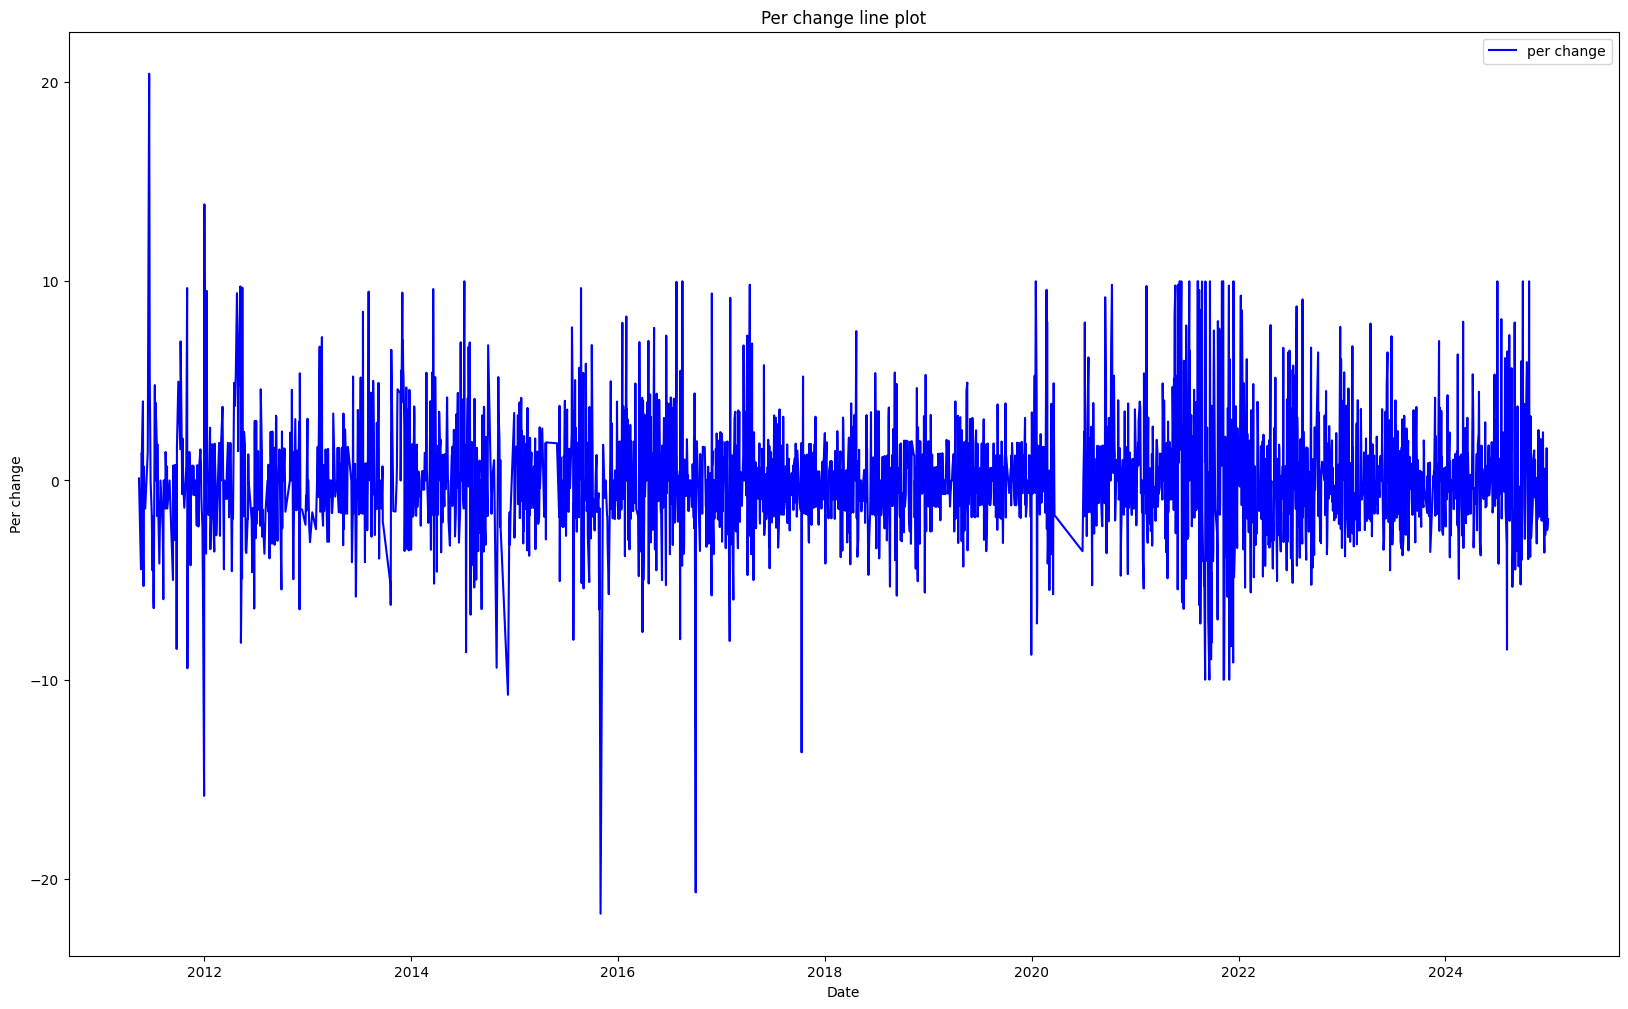

In [20]:
plt.figure(figsize=(20, 12))
plt.plot(icfc['published_date'].to_list(), icfc['per_change'].to_list(), linestyle='-', color='b', label='per change')
plt.xlabel('Date')
plt.ylabel('Per change')
plt.title('Per change line plot')
plt.legend()
plt.show()

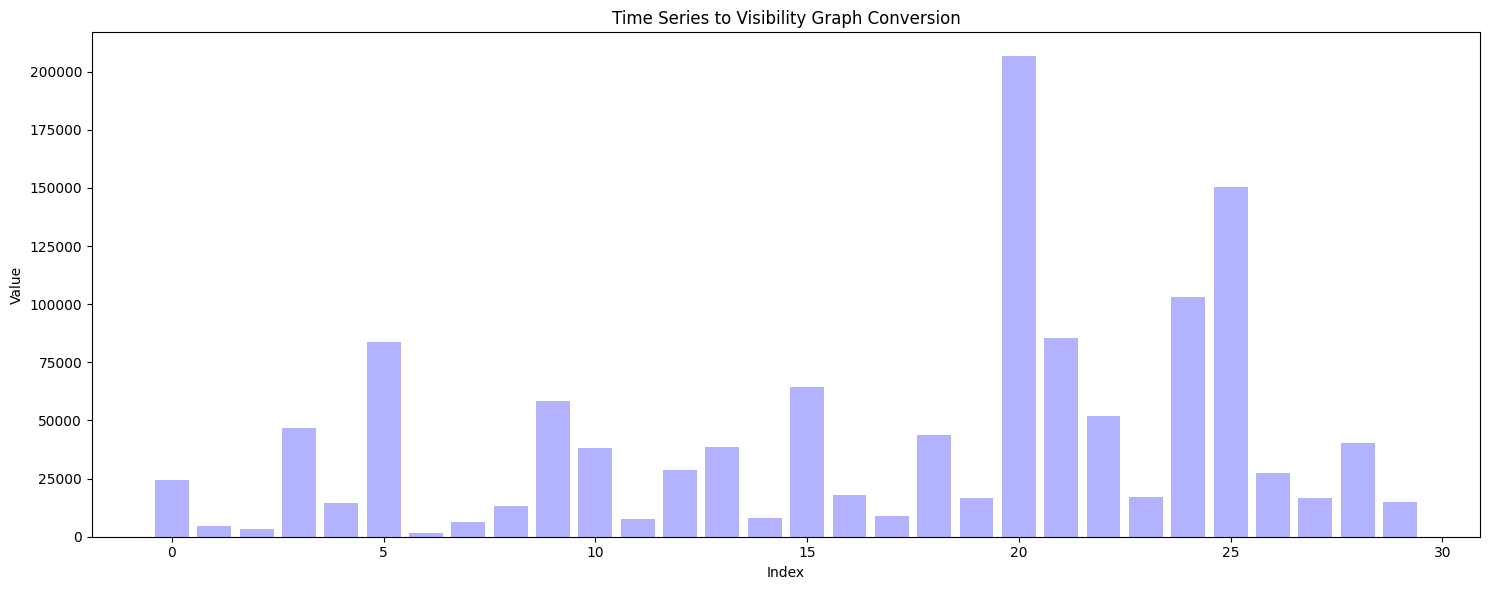

[Timestamp('2011-05-16 00:00:00'), Timestamp('2011-05-18 00:00:00'), Timestamp('2011-05-19 00:00:00'), Timestamp('2011-05-23 00:00:00'), Timestamp('2011-05-24 00:00:00'), Timestamp('2011-05-25 00:00:00'), Timestamp('2011-05-26 00:00:00'), Timestamp('2011-05-30 00:00:00'), Timestamp('2011-05-31 00:00:00'), Timestamp('2011-06-01 00:00:00'), Timestamp('2011-06-02 00:00:00'), Timestamp('2011-06-05 00:00:00'), Timestamp('2011-06-07 00:00:00'), Timestamp('2011-06-16 00:00:00'), Timestamp('2011-06-21 00:00:00'), Timestamp('2011-06-23 00:00:00'), Timestamp('2011-06-26 00:00:00'), Timestamp('2011-06-30 00:00:00'), Timestamp('2011-07-03 00:00:00'), Timestamp('2011-07-05 00:00:00'), Timestamp('2011-07-06 00:00:00'), Timestamp('2011-07-07 00:00:00'), Timestamp('2011-07-11 00:00:00'), Timestamp('2011-07-12 00:00:00'), Timestamp('2011-07-13 00:00:00'), Timestamp('2011-07-14 00:00:00'), Timestamp('2011-07-18 00:00:00'), Timestamp('2011-07-19 00:00:00'), Timestamp('2011-07-20 00:00:00'), Timestamp('20

In [21]:
vis_col = 'close'
vis_icfc = icfc[0:30]['traded_amount'].to_list()
vis_nabil = nabil[0:30][vis_col].to_list()
date_icfc = icfc[0:30]['published_date'].to_list()
print(date_icfc)
date_nabil = nabil[0:30]['published_date'].to_list()
print(date_nabil)
# connect_visibility_graphs2(vis_icfc, vis_nabil, date_icfc, date_nabil)